# Solar oscillation analysis
Sensitivity analysis for standard solar neutrino oscillations. To run it:
- Source ROOT python3 env
- Source RAT-TOOLs env

## Pee vs energy

In [1]:
### Load and configure PSelmaa
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import interp1d,interp2d
import pandas as pd
import solar_tools
vOsc = solar_tools.SolarOsc()
default_cycle = plt.rcParams['axes.prop_cycle']

ImportError: No module named pandas

In [51]:
### Oscillation parameters

#PDG18 global fit [http://pdg.lbl.gov/2019/reviews/rpp2018-rev-neutrino-mixing.pdf]
DMSQ12_PDG18 = 7.370e-5
DMSQ13_PDG18 = 2.56e-3
SSTH12_PDG18 = 0.297
SSTH13_PDG18 = 0.0215 #NH
TSTH12_PDG18 = SSTH12_PDG18/(1-SSTH12_PDG18)
print('TSTH12_PDG18=',TSTH12_PDG18)

#PDG20 global nu fit [http://pdg.lbl.gov/2019/reviews/rpp2019-rev-neutrino-mixing.pdf] [http://www.nu-fit.org/]
DMSQ12_PDG20 = 7.390e-5
DMSQ13_PDG20 = 2.454e-3
SSTH12_PDG20 = 0.310
SSTH13_PDG20 = 0.02237 #NH
TSTH12_PDG20 = SSTH12_PDG20/(1-SSTH12_PDG20)
print('TSTH12_PDG20=',TSTH12_PDG20)

# #KamLAND fit [https://journals.aps.org/prd/pdf/10.1103/PhysRevD.88.033001]
# DMSQ12_KL = 7.54e-5
# TSTH12_KL = 0.481
# SSTH13_KL = 0.01
# SSTH12_KL = TSTH12_KL/(1+TSTH12_KL)
# print('SSTH12_KL=',SSTH12_KL)

#SK fit [https://arxiv.org/pdf/1606.07538.pdf]
DMSQ12_SK = 4.8e-5
SSTH12_SK = 0.334
SSTH13_SK = 0.03 # SK+KL
TSTH12_SK = SSTH12_SK/(1-SSTH12_SK)
print('TSTH12_SK=',TSTH12_SK)

#KamLAND from nufit19 [https://arxiv.org/pdf/1811.05487.pdf]
DMSQ12_KL = 7.48e-5
SSTH12_KL = 0.290
SSTH13_KL = 0.02237
TSTH12_KL = SSTH12_KL/(1-SSTH12_KL)
print('TSTH12_KL=',TSTH12_KL)

#All solar from nufit19 [https://arxiv.org/pdf/1606.07538.pdf]
DMSQ12_solar = 5.1e-5
SSTH12_solar = 0.315
SSTH13_solar = 0.02237
TSTH12_solar = SSTH12_solar/(1-SSTH12_solar)
print('TSTH12_solar=',TSTH12_solar)

#Solar fit [https://arxiv.org/pdf/1611.01514.pdf] NOT CLEAR WHAT THE ONLY-SOLAR VALUES ARE
# 0.422475, 0.0215, 4.8e-5, 2.56e-3

#Set parameters used by vOsc:
vOsc.SSTH13 = SSTH13_PDG20
vOsc.DMSQ13 = DMSQ13_PDG20


TSTH12_PDG18= 0.42247510668563293
TSTH12_PDG20= 0.44927536231884063
TSTH12_SK= 0.5015015015015016
TSTH12_KL= 0.4084507042253521
TSTH12_solar= 0.45985401459854014


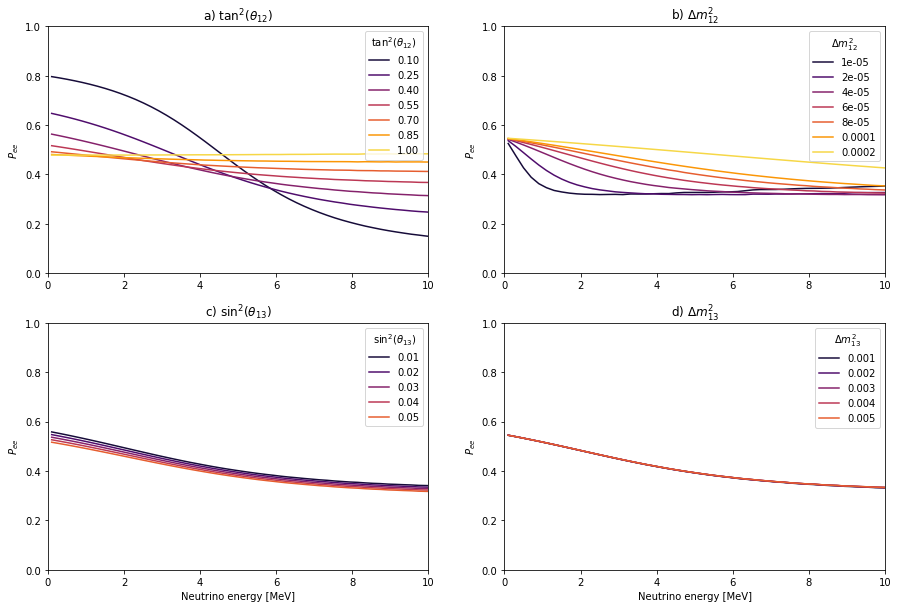

Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root


In [52]:
### Draw Pees dependencies with parameters
Enus = np.linspace(0.1,20.0,100)

tansqth12s = np.linspace(0.1,1.0,7)
dmsq21s = [1.0e-5,2.0e-5,4.0e-5,6.0e-5,8.0e-5,10.0e-5,20.0e-5]
sinsqth13s = [0.01,0.02,0.03,0.04,0.05]
dmsq31s = [1.0e-3,2.0e-3,3.0e-3,4.0e-3,5.0e-3]
pee_b8_th12 = [vOsc.generate_pee(Enus, 'b8', tansqth12, SSTH13_PDG20, DMSQ12_PDG20, DMSQ13_PDG20) for tansqth12 in tansqth12s]
pee_b8_dm12 = [vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20) for dmsq21 in dmsq21s]
pee_b8_th13 = [vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, sinsqth13, DMSQ12_PDG20, DMSQ13_PDG20) for sinsqth13 in sinsqth13s]
pee_b8_dm13 = [vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, DMSQ12_PDG20, dmsq31) for dmsq31 in dmsq31s]

plt.figure(figsize=(15,10))
#Set colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.inferno(np.linspace(0.1,0.9,len(pee_b8_th12))))

plt.subplot(221)
for iplot, pee in enumerate(pee_b8_th12):
    plt.plot(Enus, pee, label='%.2f'%tansqth12s[iplot])
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'a) $\tan^2(\theta_{12})$')
plt.ylabel(r'$P_{ee}$')
plt.legend(title=r'$\tan^2(\theta_{12})$')

plt.subplot(222)
for iplot, pee in enumerate(pee_b8_dm12):
    plt.plot(Enus, pee, label=dmsq21s[iplot])
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'b) $\Delta m_{12}^2$')
plt.ylabel(r'$P_{ee}$')
plt.legend(title=r'$\Delta m_{12}^2$')

plt.subplot(223)
for iplot, pee in enumerate(pee_b8_th13):
    plt.plot(Enus, pee, label=sinsqth13s[iplot])
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'c) $\sin^2(\theta_{13})$')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend(title=r'$\sin^2(\theta_{13})$')

plt.subplot(224)
for iplot, pee in enumerate(pee_b8_dm13):
    plt.plot(Enus, pee, label=dmsq31s[iplot])
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'd) $\Delta m_{13}^2$')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend(title=r'$\Delta m_{13}^2$')

plt.savefig('./results/pees_vs_params.pdf')

plt.show()


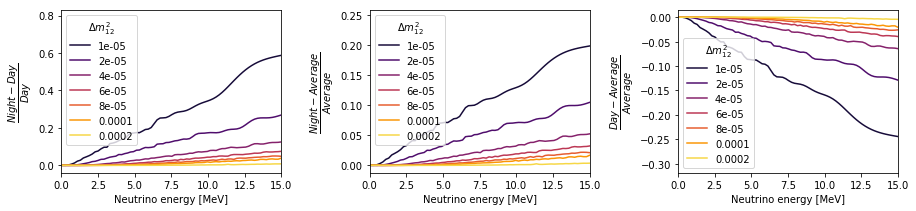

In [53]:
# Test day/night asymmetry
plt.figure(figsize=(15,3))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
for dmsq21 in dmsq21s:
    pee_b8_solar_day = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'day')
    pee_b8_solar_night = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'night')
    pee_b8_solar_asym = (pee_b8_solar_night - pee_b8_solar_day)/pee_b8_solar_day
    plt.plot(Enus, pee_b8_solar_asym,label=dmsq21)
# plt.ylim(0.0,1.0)
plt.xlim(0.,15.)
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$\dfrac{Night - Day}{Day}$')
plt.legend(title=r'$\Delta m^2_{12}$')

plt.subplot(132)
for dmsq21 in dmsq21s:
    pee_b8_solar = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'average')
    pee_b8_solar_night = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'night')
    pee_b8_solar_asym = (pee_b8_solar_night - pee_b8_solar)/pee_b8_solar
    plt.plot(Enus, pee_b8_solar_asym,label=dmsq21)
# plt.ylim(0.0,1.0)
plt.xlim(0.,15.)
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$\dfrac{Night - Average}{Average}$')
plt.legend(title=r'$\Delta m^2_{12}$')

plt.subplot(133)
for dmsq21 in dmsq21s:
    pee_b8_solar = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'average')
    pee_b8_solar_day = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, dmsq21, DMSQ13_PDG20,'day')
    pee_b8_solar_asym = (pee_b8_solar_day - pee_b8_solar)/pee_b8_solar
    plt.plot(Enus, pee_b8_solar_asym,label=dmsq21)
# plt.ylim(0.0,1.0)
plt.xlim(0.,15.)
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$\dfrac{Day - Average}{Average}$')
plt.legend(title=r'$\Delta m^2_{12}$')

plt.savefig('./results/pees_daynight.pdf')

plt.show()



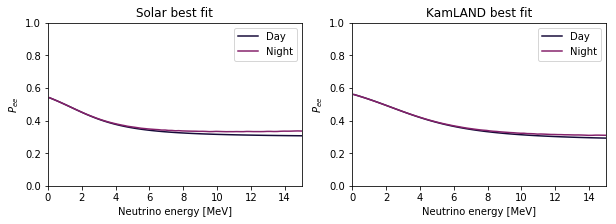

In [54]:
# Solar and KL day/night asymmetry
pee_b8_solar_def = vOsc.generate_pee(Enus, 'b8', TSTH12_solar, SSTH13_solar, DMSQ12_solar, DMSQ13_PDG20, None)
pee_b8_solar_ave = vOsc.generate_pee(Enus, 'b8', TSTH12_solar, SSTH13_solar, DMSQ12_solar, DMSQ13_PDG20, 'average')
pee_b8_solar_day = vOsc.generate_pee(Enus, 'b8', TSTH12_solar, SSTH13_solar, DMSQ12_solar, DMSQ13_PDG20, 'day')
pee_b8_solar_night = vOsc.generate_pee(Enus, 'b8', TSTH12_solar, SSTH13_solar, DMSQ12_solar, DMSQ13_PDG20, 'night')
pee_b8_KL_day = vOsc.generate_pee(Enus, 'b8', TSTH12_KL, SSTH13_KL, DMSQ12_KL, DMSQ13_PDG20, 'day')
pee_b8_KL_night = vOsc.generate_pee(Enus, 'b8', TSTH12_KL, SSTH13_KL, DMSQ12_KL, DMSQ13_PDG20, 'night')

plt.figure(figsize=(10,3))
plt.subplot(121)
# plt.plot(Enus, pee_b8_solar_def, label='Average', color='red')
# plt.plot(Enus, pee_b8_solar_ave, label='Average', color='blue')
plt.plot(Enus, pee_b8_solar_day, label='Day', color='C0')
plt.plot(Enus, pee_b8_solar_night, label='Night', color='C9')
plt.ylim(0.0,1.0)
plt.xlim(0.,15.)
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.title(r'Solar best fit')
plt.legend()

plt.subplot(122)
plt.plot(Enus, pee_b8_KL_day, label='Day', color='C0')
plt.plot(Enus, pee_b8_KL_night, label='Night', color='C9')
plt.ylim(0.0,1.0)
plt.xlim(0.,15.)
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.title(r'KamLAND best fit')
plt.legend()

plt.savefig('./results/pees_daynight_KL_solar.pdf')

plt.show()

In [55]:
### Generate various Pees

pee_PDG20_b8 = vOsc.generate_pee(Enus, 'b8', TSTH12_PDG20, SSTH13_PDG20, DMSQ12_PDG20, DMSQ13_PDG20)
pee_PDG20_pep = vOsc.generate_pee(Enus, 'pep', TSTH12_PDG20, SSTH13_PDG20, DMSQ12_PDG20, DMSQ13_PDG20)
pee_PDG20_pp = vOsc.generate_pee(Enus, 'pp', TSTH12_PDG20, SSTH13_PDG20, DMSQ12_PDG20, DMSQ13_PDG20)
pee_PDG20_be7 = vOsc.generate_pee(Enus, 'be7', TSTH12_PDG20, SSTH13_PDG20, DMSQ12_PDG20, DMSQ13_PDG20)

pee_KL_b8 = vOsc.generate_pee(Enus, 'b8', TSTH12_KL, SSTH13_PDG20, DMSQ12_KL, DMSQ13_PDG20)
pee_KL_pep = vOsc.generate_pee(Enus, 'pep', TSTH12_KL, SSTH13_PDG20, DMSQ12_KL, DMSQ13_PDG20)
pee_KL_pp = vOsc.generate_pee(Enus, 'pp', TSTH12_KL, SSTH13_PDG20, DMSQ12_KL, DMSQ13_PDG20)
pee_KL_be7 = vOsc.generate_pee(Enus, 'be7', TSTH12_KL, SSTH13_PDG20, DMSQ12_KL, DMSQ13_PDG20)

pee_solar_b8 = vOsc.generate_pee(Enus, 'b8', TSTH12_solar, SSTH13_PDG20, DMSQ12_solar, DMSQ13_PDG20)
pee_solar_pep = vOsc.generate_pee(Enus, 'pep', TSTH12_solar, SSTH13_PDG20, DMSQ12_solar, DMSQ13_PDG20)
pee_solar_pp = vOsc.generate_pee(Enus, 'pp', TSTH12_solar, SSTH13_PDG20, DMSQ12_solar, DMSQ13_PDG20)
pee_solar_be7 = vOsc.generate_pee(Enus, 'be7', TSTH12_solar, SSTH13_PDG20, DMSQ12_solar, DMSQ13_PDG20)


Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_models.root
Opening sun input file : /Users/jcaravaca/Work/install/SNO+/rat-tools/PSelmaa/solar_models/sun_data_mode

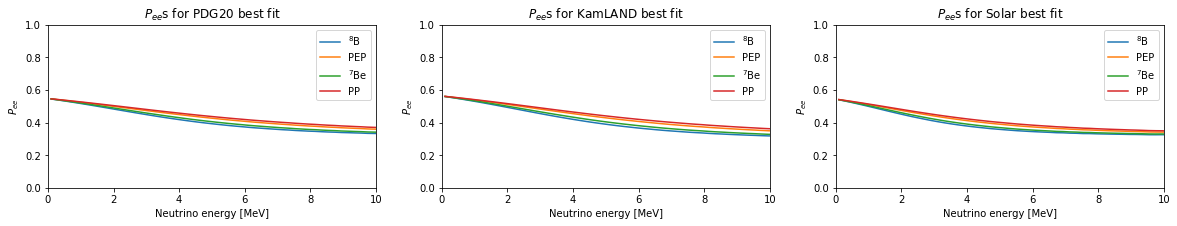

In [56]:
### Draw Pees
plt.figure(figsize=(20,3))
#Set colors
mpl.rcParams['axes.prop_cycle'] = default_cycle

plt.subplot(131)
plt.plot(Enus, pee_PDG20_b8,  label=r'$^{8}$B')
plt.plot(Enus, pee_PDG20_pep, label=r'PEP')
plt.plot(Enus, pee_PDG20_be7, label=r'$^{7}$Be')
plt.plot(Enus, pee_PDG20_pp,  label=r'PP')
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'$P_{ee}$s for PDG20 best fit')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend()

plt.subplot(132)
plt.plot(Enus, pee_KL_b8,  label=r'$^{8}$B')
plt.plot(Enus, pee_KL_pep, label=r'PEP')
plt.plot(Enus, pee_KL_be7, label=r'$^{7}$Be')
plt.plot(Enus, pee_KL_pp,  label=r'PP')
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'$P_{ee}$s for KamLAND best fit')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend()

plt.subplot(133)
plt.plot(Enus, pee_solar_b8,  label=r'$^{8}$B')
plt.plot(Enus, pee_solar_pep, label=r'PEP')
plt.plot(Enus, pee_solar_be7, label=r'$^{7}$Be')
plt.plot(Enus, pee_solar_pp,  label=r'PP')
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'$P_{ee}$s for Solar best fit')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend()

plt.savefig('./results/pees.pdf')

plt.show()

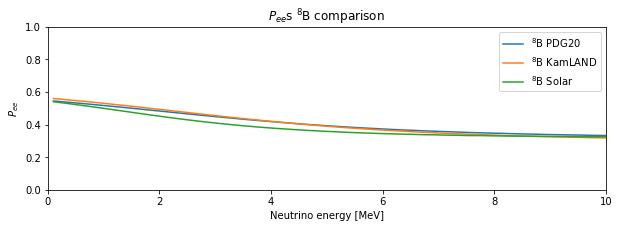

In [288]:
plt.figure(figsize=(10,3))
plt.plot(Enus, pee_PDG20_b8,  label=r'$^{8}$B PDG20')
plt.plot(Enus, pee_KL_b8,  label=r'$^{8}$B KamLAND')
plt.plot(Enus, pee_solar_b8,  label=r'$^{8}$B Solar')
plt.ylim(0.,1.)
plt.xlim(0.,10.)
plt.title(r'$P_{ee}$s $^{8}$B comparison')
plt.xlabel('Neutrino energy [MeV]')
plt.ylabel(r'$P_{ee}$')
plt.legend()
plt.savefig('./results/pees_tension.pdf')
plt.show()

## RAT PDFs

In [178]:
from root_numpy import root2array, tree2array
import glob

In [220]:
### Parameters
FV_RAD = 5.5           # FV radial cut [m] (FULL=6.0053)
ENERGY_CUT = 4.5       # Minimum visible energy [MeV] (Applies to RAT selection)
SOLAR_YEAR = {'nue':{}, 'numu':{}}   # Number of detected nue/year with no oscillations
SOLAR_YEAR['nue']['B8'] = 2726.0
SOLAR_YEAR['nue']['PEP'] = 13094.4
SOLAR_YEAR['nue']['BE7'] = 222009.3
SOLAR_YEAR['numu']['B8'] = 486.6
SOLAR_YEAR['numu']['PEP'] = 2662.1
SOLAR_YEAR['numu']['BE7'] = 49527.1
NYEARS= 5.0
NBINS = 50            # Number of bins in energy histograms
MAXEVENTS = 1000000

In [221]:
### Get PDFs from RAT ntuples
branches=['eventID','parentKE1','energy','mcEdep','mcEdepQuenched','mcPosr','evIndex','mcPosx','mcPosy','mcPosz']
files_path = '/Users/jcaravaca/Work/data/SNO+/Solar/production/6.16.6/'; suffix='Solar'      # 6.16.6 RAT Solar production

solar_filenames = {'nue':{},'numu':{}} # Dictionary for SNO+RAT production files
solar_nruns = {'nue':{},'numu':{}} # Dictionary for SNO+RAT production files

solar_filenames['nue'] = {'B8':'SolarB8_Solar_Nue_r*.root',
                          'PEP':'SolarPep_Solar_Nue_r*.root',
                          'BE7':'SolarBe7_Solar_Nue_r*.root',
                          }
solar_filenames['numu'] = {'B8':'SolarB8_Solar_Numu_r*.root',
                           'PEP':'SolarPep_Solar_Numu_r*.root',
                           'BE7':'SolarBe7_Solar_Numu_r*.root',
                           }

solar_nruns['nue'] = {label:len(glob.glob(files_path+file)) for (label,file) in solar_filenames['nue'].items() }
solar_nruns['numu'] = {label:len(glob.glob(files_path+file)) for (label,file) in solar_filenames['numu'].items() }

solar_events = {}
solar_events['nue'] = {label:root2array(files_path+file,treename='output',selection='evIndex<=0 && mcPosr<%f && energy>%f'%(FV_RAD*1000,ENERGY_CUT),branches=branches,stop=MAXEVENTS) for (label,file) in solar_filenames['nue'].items()}
solar_events['numu'] = {label:root2array(files_path+file,treename='output',selection='evIndex<=0 && mcPosr<%f && energy>%f'%(FV_RAD*1000,ENERGY_CUT),branches=branches,stop=MAXEVENTS) for (label,file) in solar_filenames['numu'].items()}


In [222]:
# Calculate normalizations
solar_norm = {'nue':{}, 'numu':{}}

solar_events_all = {}
solar_events_all['nue'] = {label:root2array(files_path+file,treename='output',branches=branches,stop=MAXEVENTS) for (label,file) in solar_filenames['nue'].items()}
solar_events_all['numu'] = {label:root2array(files_path+file,treename='output',branches=branches,stop=MAXEVENTS) for (label,file) in solar_filenames['numu'].items()}

solar_norm['nue'] = {label:SOLAR_YEAR['nue'][label]/len(solar_events_all['nue'][label]['evIndex'])*NYEARS for (label,file) in solar_filenames['nue'].items()}
solar_norm['numu'] = {label:SOLAR_YEAR['numu'][label]/len(solar_events_all['numu'][label]['evIndex'])*NYEARS for (label,file) in solar_filenames['numu'].items()}


In [223]:
hist_nue_b8, bins = vOsc.get_histogram(solar_events['nue']['B8'],'energy',NBINS)
hist_nue_b8_noosc = vOsc.get_mchist_osc(solar_events, solar_norm, 0.0, 0.0, NBINS) #No oscillations
hist_nue_b8_KL = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_KL, DMSQ12_KL, NBINS)
hist_nue_b8_solar = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_solar, DMSQ12_solar, NBINS)
hist_nue_b8_pdg20 = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_PDG20, DMSQ12_PDG20, NBINS)

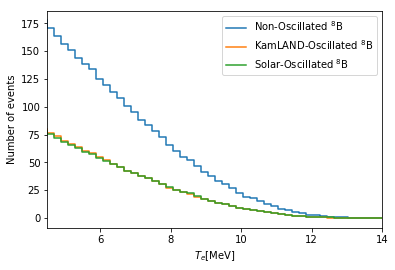

Total number of expected events
No osc= 2808.3524600000005
With osc= 1242.5565126847773


In [224]:
# Draw histograms for nue B8
plt.step(bins[0:-1],hist_nue_b8_noosc,label=r'Non-Oscillated $^{8}$B')
plt.step(bins[0:-1],hist_nue_b8_KL,label=r'KamLAND-Oscillated $^{8}$B')
plt.step(bins[0:-1],hist_nue_b8_solar,label=r'Solar-Oscillated $^{8}$B')
plt.ylabel('Number of events')
plt.xlabel(r'$T_e$[MeV]')
plt.xlim(ENERGY_CUT,14.)
#plt.yscale('log')
plt.legend()
plt.savefig('./results/solar_pdfs_b8nue_4p5MeV.pdf')
plt.show()

print('Total number of expected events')
print('No osc=', hist_nue_b8_noosc.sum() )
print('With osc=', hist_nue_b8_pdg20.sum() )


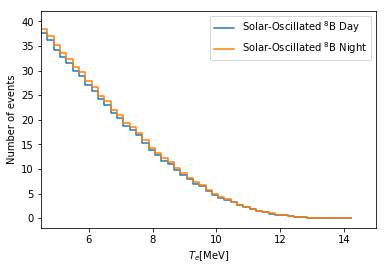

In [225]:
# Test day/night for solar
hist_nue_b8, bins = vOsc.get_histogram(solar_events['nue']['B8'],'energy',NBINS)
hist_nue_b8_day = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_solar, DMSQ12_solar, NBINS, 'day')
hist_nue_b8_night = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_solar, DMSQ12_solar, NBINS, 'night')

# Draw histograms
plt.step(bins[0:-1],hist_nue_b8_day,label=r'Solar-Oscillated $^{8}$B Day')
plt.step(bins[0:-1],hist_nue_b8_night,label=r'Solar-Oscillated $^{8}$B Night')
plt.ylabel('Number of events')
plt.xlabel(r'$T_e$[MeV]')
plt.xlim(ENERGY_CUT,15.)
# plt.yscale('log')
plt.legend()
plt.savefig('./results/solar_pdfs_dn.pdf')
plt.show()


## Likelihood analysis

In [277]:
### Parameters

#Oscillation parameters
USEDPARAMS = 'solar' #solar, KL
vOsc.MULTITHREAD = False     #DOES NOT REALLY WORK. I THINK BECAUSE OF PSELMAA...

# Physics stuff
vOsc.useB8 = True            # Whether adding B8 to analysis
vOsc.usePEP = False          # Whether adding PEP to analysis
vOsc.useBE7 = False          # Whether adding BE7 to analysis
vOsc.DAYNIGHT = True         # Consider D/N asymmetry in analysis

# Likelihood space
vOsc.TANSQTH12 = True                 # True = tan2(θ12), False = sin2(θ12)
vOsc.TH12LIMLIN = [0.1,0.6]           # Linear scale limits for θ12
vOsc.DM12LIMLIN = [1.0e-6,2.5e-4]     # Linear scale limits for Δm12
vOsc.TH12LOG = True                   # Enable Log scale for θ12
vOsc.DM12LOG = True                   # Enable Log scale for Δm12
vOsc.TH12LIMLOG = [-1,0]              # Log scale limits for θ12
vOsc.DM12LIMLOG = [np.log10(3e-6),-3] # Log scale limits for θ12
vOsc.NPOINTS_TH12 = 20                # Number of points for th12 axis in L-space 
vOsc.NPOINTS_DM12 = 100               # Number of points for Dm12 axis in L-space


### Define models and draw Likelihood spaces

In [278]:
tstart = time.time()
if USEDPARAMS == 'solar':
    #SOLAR parameters
    hist_solar_day = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_solar, DMSQ12_solar, NBINS, opt='day')
    hist_solar_night = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_solar, DMSQ12_solar, NBINS, opt='night')
    th12_axis, dmsq12_axis, likelihood_space_solar = vOsc.calc_likelihood_space(solar_events, solar_norm, NBINS, hist_solar_day, hist_solar_night)
elif USEDPARAMS == 'KL':
    ### KAMLAND parameters
    hist_KL_day = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_KL, DMSQ12_KL, NBINS, opt='day')
    hist_KL_night = vOsc.get_mchist_osc(solar_events, solar_norm, TSTH12_KL, DMSQ12_KL, NBINS, opt='night')
    th12_axis, dmsq12_axis, likelihood_space_KL = vOsc.calc_likelihood_space(solar_events, solar_norm, NBINS, hist_KL_day, hist_KL_night)
tend = time.time()
print('Likelihood space computation finished. Time=%.2fs'%(tend-tstart))

Likelihood space computation finished. Time=1693.22s


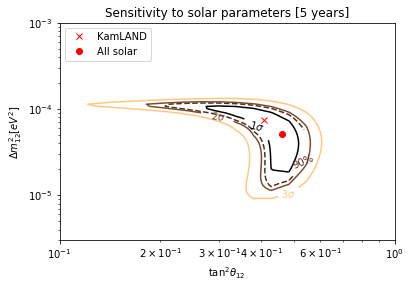

In [279]:
#Plot
if USEDPARAMS == 'solar':
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_solar, nsigma=-2)
elif USEDPARAMS == 'KL':
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_KL, nsigma=-2)
#Draw BF points
if vOsc.TANSQTH12:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(TSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
else:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(SSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
plt.legend(loc='upper left')
plt.title('Sensitivity to %s parameters [%i years]'%(USEDPARAMS,NYEARS))
plt.savefig('./results/sensi_%s_%iyears.pdf'%(USEDPARAMS,NYEARS))
plt.show()


## Reactor likelihoods

In [280]:
filename_reactor_KL_1yr = './data/SNOP_months12_flux1_GEO_ratemidq_1.0x_expec_KL_linlintan.csv'
filename_reactor_solar_1yr = './data/SNOP_months12_flux1_GEO_ratemidq_1.0x_expec_solar_linlintan.csv'
filename_reactor_KL_5yr = './data/SNOP_months60_flux1_GEO_ratemidq_1.0x_expec_KL_linlintan.csv'
filename_reactor_solar_5yr = './data/SNOP_months60_flux1_GEO_ratemidq_1.0x_expec_Solar_linlintan.csv'


In [281]:
def get_reactor_likelihood(filename):
    L_reactor_KL = pd.read_csv(filename)
    L_reactor_KL = L_reactor_KL.dropna()
    L_reactor_KL = L_reactor_KL.sort_values(['xbin','ybin'])
    sinsqth12_axis = L_reactor_KL['s12'].unique()
    tansqth12_axis = sinsqth12_axis/np.sqrt(1-sinsqth12_axis)
    dmsq12_axis = L_reactor_KL['d21'].unique()
    L_reactor_KL['lh_value'] = L_reactor_KL['lh_value'].values*(-1)
    L_reactor_KL['lh_value'] = L_reactor_KL['lh_value'] - L_reactor_KL['lh_value'].min()
    likelihood_space_2D = np.full((len(tansqth12_axis), len(dmsq12_axis)), fill_value=999.0)
#     likelihood_space_2D = np.zeros((len(tansqth12_axis), len(dmsq12_axis)))
    
    for index, ibin in L_reactor_KL.iterrows():
        xbin = int(ibin['xbin'])-1
        ybin = int(ibin['ybin'])-1
        likelihood_space_2D[xbin,ybin] = ibin['lh_value']
    return tansqth12_axis, dmsq12_axis, likelihood_space_2D

def plot_reactor_contours(filename):
    '''
    Draw sensitivity contours from CSV file
    '''
    tansqth12_axis, dmsq12_axis, likelihood_space_2D = get_reactor_likelihood(filename)
    vOsc.plot_contour(tansqth12_axis, dmsq12_axis, likelihood_space_2D, filled=True)


Error during contour plotting!


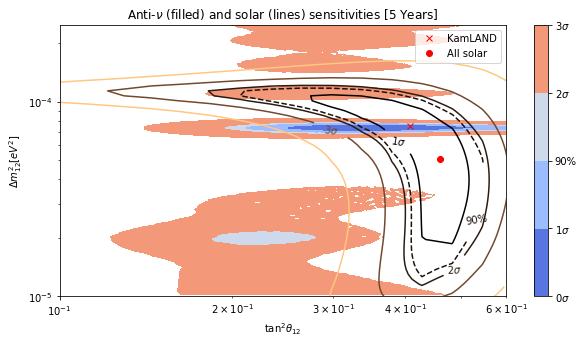

In [282]:
plt.figure(figsize=(10,5))
if USEDPARAMS == 'solar':
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_solar)
elif USEDPARAMS == 'KL':
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_KL)
if NYEARS==1:
    filename_reactor_solar = filename_reactor_solar_1yr
    filename_reactor_KL = filename_reactor_KL_1yr
elif NYEARS==5:
    filename_reactor_solar = filename_reactor_solar_5yr
    filename_reactor_KL = filename_reactor_KL_5yr
else:
    print('No antinu contour found for %i years',NYEARS)
plot_reactor_contours(filename_reactor_KL)
#Draw BF points
if vOsc.TANSQTH12:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(TSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
else:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(SSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
plt.xlim(0.1,0.6)
plt.ylim(0.1e-4,2.5e-4)
plt.title(r'Anti-$\nu$ (filled) and solar (lines) sensitivities [%i Years]'%NYEARS)
plt.legend()
plt.savefig('./results/sensi_antinu_%iyears.pdf'%NYEARS)
plt.show()


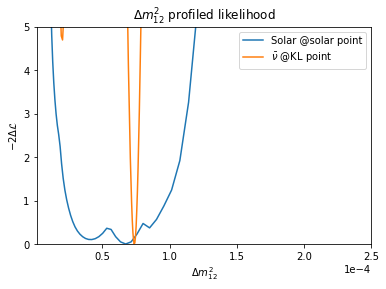

In [283]:
### Profile Dm2
if USEDPARAMS == 'solar':
    vOsc.plot_profile_likelihood(th12_axis, dmsq12_axis, likelihood_space_solar,label='Solar @solar point')
if USEDPARAMS == 'KL':
    vOsc.plot_profile_likelihood(th12_axis, dmsq12_axis, likelihood_space_KL,label='Solar @KL point')
reactor_L = get_reactor_likelihood(filename_reactor_KL)
vOsc.plot_profile_likelihood(*reactor_L,label=r'$\bar{\nu}$ @KL point')
plt.title(r'$\Delta m^2_{12}$ profiled likelihood')
plt.xlim(vOsc.DM12LIMLIN[0],vOsc.DM12LIMLIN[1])
plt.ylim(0,5)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.legend()
plt.savefig('./results/sensi_dm2_%iyears.pdf'%NYEARS)
plt.show()


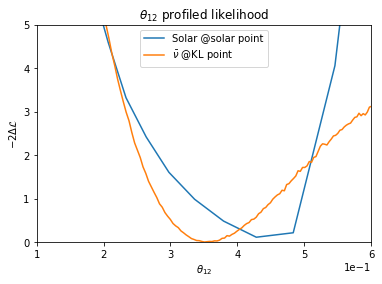

In [284]:
### Profile θ12
if USEDPARAMS == 'solar':
    vOsc.plot_profile_likelihood(th12_axis, dmsq12_axis, likelihood_space_solar,label='Solar @solar point',axis=1)
if USEDPARAMS == 'KL':
    vOsc.plot_profile_likelihood(th12_axis, dmsq12_axis, likelihood_space_KL,label='Solar @KL point',axis=1)
reactor_L = get_reactor_likelihood(filename_reactor_KL)
vOsc.plot_profile_likelihood(*reactor_L,label=r'$\bar{\nu}$ @KL point',axis=1)
plt.title(r'$\theta_{12}$ profiled likelihood')
plt.xlim(vOsc.TH12LIMLIN[0],vOsc.TH12LIMLIN[1])
plt.ylim(0,5)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-1,0))
plt.legend()
plt.savefig('./results/sensi_th12_%iyears.pdf'%NYEARS)
plt.show()


## Combined analysis

Error during contour plotting!


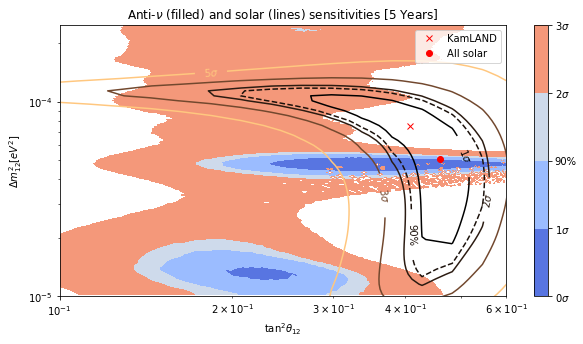

In [285]:
#First plot sensitivities for both

plt.figure(figsize=(10,5))
if USEDPARAMS == 'solar':
    plot_reactor_contours(filename_reactor_solar)
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_solar, bfpoints='False')
if USEDPARAMS == 'KL':
    plot_reactor_contours(filename_reactor_KL)
    vOsc.plot_contour(th12_axis, dmsq12_axis, likelihood_space_KL, bfpoints='False')
#Draw BF points
if vOsc.TANSQTH12:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(TSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
else:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(SSTH12_solar, DMSQ12_solar, 'ro', label='All solar')
plt.xlim(0.1,0.6)
plt.ylim(0.1e-4,2.5e-4)
plt.title(r'Anti-$\nu$ (filled) and solar (lines) sensitivities [%i Years]'%NYEARS)
plt.legend()
# plt.savefig('./results/sensi_antinu_solar_%iyears.pdf'%NYEARS)
plt.show()



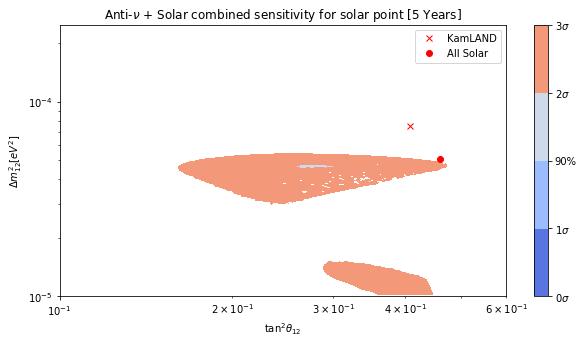

In [286]:
#Sum likelihoods
if USEDPARAMS == 'solar':
    result = get_reactor_likelihood(filename_reactor_solar)
if USEDPARAMS == 'KL':
    result = get_reactor_likelihood(filename_reactor_KL)
ll_interpol2d_reactor = interp2d(result[0],result[1],result[2].transpose())
ll_interpol2d_solar   = interp2d(th12_axis, dmsq12_axis, likelihood_space_KL.transpose())
ll_space_2D_all = ll_interpol2d_reactor(result[0], result[1]) + ll_interpol2d_solar(result[0],result[1])

plt.figure(figsize=(10,5))
vOsc.plot_contour(result[0],result[1], ll_space_2D_all.transpose(), filled=True)
#Draw BF points
if vOsc.TANSQTH12:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(TSTH12_solar, DMSQ12_solar, 'ro', label='All Solar')
else:
    plt.plot(TSTH12_KL, DMSQ12_KL, 'rx', label=r'KamLAND')
    plt.plot(SSTH12_solar, DMSQ12_solar, 'ro', label='All Solar')
plt.xlim(0.1,0.6)
plt.ylim(0.1e-4,2.5e-4)
plt.title(r'Anti-$\nu$ + Solar combined sensitivity for %s point [%i Years]'%(USEDPARAMS,NYEARS))
plt.legend()
plt.savefig('./results/sensi_antinucombined_%s_%iyears.pdf'%(USEDPARAMS,NYEARS))
plt.show()
